In [1]:
#IMPORTS

import matplotlib
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.interpolate
import mne
import scipy
import statistics
from pywt import wavedec
from scipy import signal
import matplotlib.colors as mcolors
import random
import seaborn as sns
import spectrum

In [2]:
from Definicions import upperchanel
from Definicions import group_inf
from Definicions import mediumchanels
from Definicions import opteciogrups
from Definicions import find_nearest
from Definicions import grabt
from Definicions import bandpower

In [3]:
#general info
#GROUPS
group1= ["FP2", "AFZ", "FZ", "FCZ", "CZ"]
group2= ["F7", "F5", "F3", "F1", "AF7", "AF3", "FP1"]
group3= ["FP2", "AF4", "AF8", "F2", "F4", "F6", "F8"]
group4= ["FT7", "T7", "TP7"]
group5= ["FC5", "FC3", "FC1", "C5", "C3", "C1"]
group6= ["CP5", "CP3", "CP1", "P7", "P5", "P3", "P1"]
group7= ["PO7", "PO3", "O1", "PO9"]
group8= ["PO4", "PO8", "O2", "PO10"]
group9= ["P2", "P4", "P6", "P8", "CP2", "CP4", "CP6"]
group10= ["FT8", "T8", "TP8"]
group11= ["CPZ", "PZ", "POZ", "OZ", "IZ"]
group12= ["FC2", "FC4", "FC6", "C2", "C4", "C6"]

#X
groups = [group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12]

In [4]:
#LOAD
x2=mne.io.read_raw_eeglab('Files/Preprocessed/sub-010003_EC.set', preload=True, verbose=True)
#GET DATA
datax2 = x2._data
#GET CHANELS
chanles_names2 = x2.ch_names
#REDUCE CHANELS TO 12
groups_date_finalle2 = opteciogrups(chanles_names2, groups, datax2)
#TRANSFORM TO MNE
titlegrup = ["ch1","ch2","ch3","ch4","ch5","ch6","ch7","ch8","ch9","ch10","ch11","ch12"]
ct_ty = ["eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg"]
sfreq = 250
info = mne.create_info(ch_names=titlegrup, sfreq=sfreq, ch_types=ct_ty)
raw2 = mne.io.RawArray(groups_date_finalle2, info)

Reading Files/Preprocessed/sub-010003_EC.fdt
Reading 0 ... 119515  =      0.000 ...   478.060 secs...
Creating RawArray with float64 data, n_channels=12, n_times=119516
    Range : 0 ... 119515 =      0.000 ...   478.060 secs
Ready.


Effective window size : 8.192 (s)


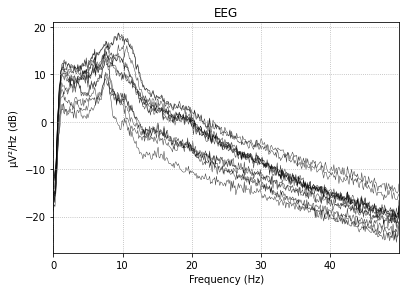

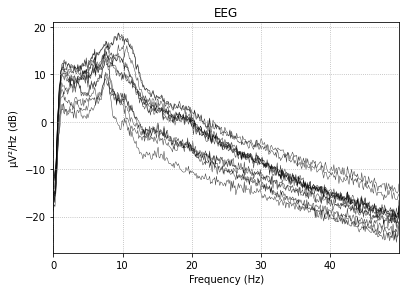

In [5]:
raw2.plot_psd(fmax=50)

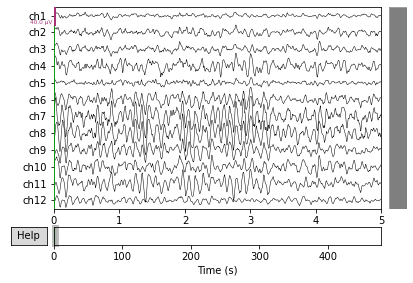

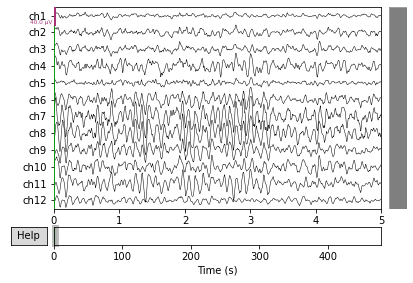

In [6]:
raw2.plot(duration=5, n_channels=12)

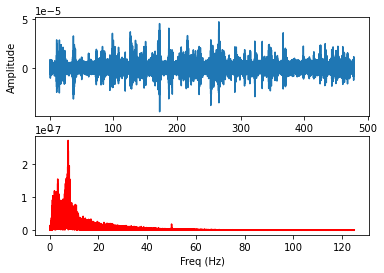

In [7]:
#ALL

import math
data = groups_date_finalle2[0]

Fs = 250.0
Ts = 1.0/Fs
t = np.arange(len(data)) / Fs

n = len(data) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))]

Y = np.fft.fft(data)/n
Y = Y[range(int(n/2))]


fig, ax = plt.subplots(2, 1)
ax[0].plot(t,data)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r')
ax[1].set_xlabel('Freq (Hz)')

plt.draw()
plt.show()

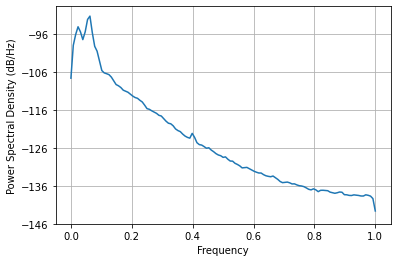

In [8]:
matplotlib.pyplot.psd(data)
plt.show()
#Frq ! radius no, should be hz.

In [9]:
# Multitaper delta power
x=5
#gamma
f_gama = bandpower(groups_date_finalle2[3], 250,[30, 250], window_sec=x, relative=True)
print(f_gama)
#beta
f_beta = bandpower(groups_date_finalle2[3], 250, [12, 30], window_sec=x, relative=True)
print(f_beta)
#alpha ???? 0.0
f_alpha = bandpower(groups_date_finalle2[3], 250, [8, 12], window_sec=x,relative=True)
print(f_alpha)
#theta
f_theta = bandpower(groups_date_finalle2[3], 250, [4, 8], window_sec=x, relative=True)
print(f_theta)
#delta
f_delta = bandpower(groups_date_finalle2[3], 250, [0.1, 4], window_sec=x, relative=True)
print(f_delta)

0.005957636035976009
0.11655156233766745
0.26098738095579505
0.3979636419491188
0.21624417325178066


In [10]:
# epoch fuction (5s split with overlap)(n epochs x)
sf=250

#INICIATE VARIABLES THAT WILL MOVE FOR EACH EPOC TIME.
tinici = 0
tfinal = 1250

#EPOCH COUNTER
numepo= 1

#WHAT CHANEL WE WORK UP ON 12
chanel = 1

#VARIABLES DONDE SE GUARDARAN LA INFORMACION DE LOS EPOCHS
save_epoc_data = []
save_epoc_temps = []

#INITIATE THE LOOP (TOTAL TIME DIVIDED IN PERIODS OF 5 SECONDS)
for i in range(0,int(int(T)/5)):

    #FROM THE CHANEL SELECTED EXTRACT THE t DATA
    t = grabt(groups_date_finalle2[chanel])

    #SELECT FROM t AND group_date THE DATA FROM POSITIONS tinici to tfinal
    epoc_temps = t[tinici:tfinal]
    epoc_data = groups_date_finalle2[chanel,tinici:tfinal]

    save_epoc_data.append(epoc_data)
    save_epoc_temps.append(epoc_temps)    

    #PRINT THE INFORMATION OF THIS EPOCH
    print("Info.; Epoch: "+str(numepo)+"; Len of the data: "+str(len(epoc_data))+"; Channel: "+str(chanel))
    numepo=numepo+1

    tfinal=tfinal+1250
    tinici= tinici+1250


Info.; Epoch: 1; Len of the data: 1250; Channel: 1
Info.; Epoch: 2; Len of the data: 1250; Channel: 1
Info.; Epoch: 3; Len of the data: 1250; Channel: 1
Info.; Epoch: 4; Len of the data: 1250; Channel: 1
Info.; Epoch: 5; Len of the data: 1250; Channel: 1
Info.; Epoch: 6; Len of the data: 1250; Channel: 1
Info.; Epoch: 7; Len of the data: 1250; Channel: 1
Info.; Epoch: 8; Len of the data: 1250; Channel: 1
Info.; Epoch: 9; Len of the data: 1250; Channel: 1
Info.; Epoch: 10; Len of the data: 1250; Channel: 1
Info.; Epoch: 11; Len of the data: 1250; Channel: 1
Info.; Epoch: 12; Len of the data: 1250; Channel: 1
Info.; Epoch: 13; Len of the data: 1250; Channel: 1
Info.; Epoch: 14; Len of the data: 1250; Channel: 1
Info.; Epoch: 15; Len of the data: 1250; Channel: 1
Info.; Epoch: 16; Len of the data: 1250; Channel: 1
Info.; Epoch: 17; Len of the data: 1250; Channel: 1
Info.; Epoch: 18; Len of the data: 1250; Channel: 1
Info.; Epoch: 19; Len of the data: 1250; Channel: 1
Info.; Epoch: 20; Len

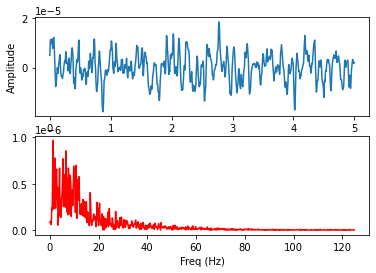

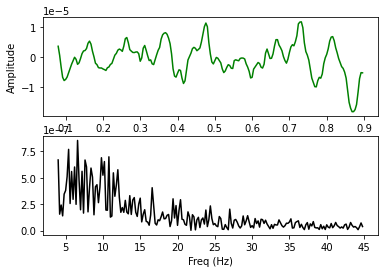

TypeError: object of type 'int' has no len()

In [11]:
for i in range(0,5):

    #select the epoch to plot
    epoc_data = save_epoc_data[i]
    epoc_temps = save_epoc_temps[i]

    #See time plt.
    Fs = 250.0 
    Ts = 1.0/Fs
    tn = np.arange(len(epoc_data)) / Fs
    

    #See frq plot.
    n = len(epoc_data)            # Length of the signal
    k = np.arange(n)
    Tn = n/Fs
    frq = k/Tn            # Two sides frequency range
    frq = frq[range(int(n/2))] #<-
    Y = np.fft.fft(epoc_data)/n
    Y = Y[range(int(n/2))]
    Yp = abs(Y)
    #print(abs(Y))
    fig, ax = plt.subplots(2, 1)
    ax[0].plot(tn,epoc_data)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')
    
    ax[1].plot(frq,abs(Y),'r')
    ax[1].set_xlabel('Freq (Hz)')
    plt.plot()
    plt.show()

    #Select Beta frequencie
    #https://numpy.org/doc/stable/reference/generated/numpy.trapz.html 

    #SELECT THE POSITION OF THE FREQ ZONES
    ti = find_nearest(frq, 4)
    tf = find_nearest(frq, 45)

    #SELECT THE data, frequency and time OF THE POSITION GIVEN
    powerv = epoc_data[ti:tf]
    mm = frq[ti:tf]
    dt = epoc_temps[ti:tf]
    Yselect = Yp[ti:tf]

    #PLOTS
    fig, ax = plt.subplots(2, 1)
    ax[0].plot(dt,powerv,'g')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')

    ax[1].plot(mm,Yselect,'k')
    ax[1].set_xlabel('Freq (Hz)')
    ax[0].set_ylabel('Amplitude')
    plt.plot()
    plt.show()
    

    # Plot the spectrogram
    samplingFrequency   = 250
    powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x, Fs=samplingFrequency)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()   


    # Compute and plot the power spectral density (PSD)
    freqs, psd = signal.welch(powerv)
    plt.semilogx(freqs, psd)
    plt.title('PSD: power spectral density')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.tight_layout()
    plt.show()


    # Multitaper delta power
    #beta
    f_beta = bandpower(epoc_data, 250, [13, 32],relative=True)
    print(f_beta)
    #gamma
    f_gama = bandpower(epoc_data, 250, [32, 100],relative=True)
    print(f_gama)
    #alpha
    f_alpha = bandpower(epoc_data, 250, [9, 13],relative=True)
    print(f_alpha)
    #theta
    f_theta = bandpower(epoc_data, 250, [4, 8],relative=True)
    print(f_theta)
    #delta
    f_delta = bandpower(epoc_data, 250, [0.1, 4],relative=True)
    print(f_delta)


    Gamma = np.trapz (np.abs(Y[(frq >= 32) & (frq <= 100)])) #the other bands
    Beta = np.trapz(np.abs (Y[(frq >= 13) & (frq <= 32)]))
    apha = np.trapz(np.abs (Y[(frq >= 9) & (frq <= 13)]))
    theta = np.trapz(np.abs (Y[(frq >= 4) & (frq <= 8)]))
    delta = np.trapz(np.abs (Y[(frq >= 0.1) & (frq <= 4)]))
    #relative band power
    gamma_b = Gamma / Beta
    apha_b = apha / Beta
    theta_b = theta / Beta
    delta_b = delta / Beta
    print()
    print('Relative band power: %.3f' % gamma_b)
    print('Relative band power: %.3f' % apha_b)
    print('Relative band power: %.3f' % delta_b)
    print('Relative band power: %.3f' % theta_b)
    
    

    # https://openresearchsoftware.metajnl.com/articles/10.5334/jors.bs/ 
    #cD5 - b.Power - power spectral density - (after - cut it in frec. and find the average, see it under the spectrum).

In [10]:
titlegrup = ["ch1","ch2","ch3","ch4","ch5","ch6","ch7","ch8","ch9","ch10","ch11","ch12"]
ct_ty = ["eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg"]
#save_epoc_data - ch1
numer=1
r=[]
chtype=[]
for i in range(0,95):
    r.append('ch1-'+str(numer))
    chtype.append('eeg')
    numer=numer+1
print(r)

['ch1-1', 'ch1-2', 'ch1-3', 'ch1-4', 'ch1-5', 'ch1-6', 'ch1-7', 'ch1-8', 'ch1-9', 'ch1-10', 'ch1-11', 'ch1-12', 'ch1-13', 'ch1-14', 'ch1-15', 'ch1-16', 'ch1-17', 'ch1-18', 'ch1-19', 'ch1-20', 'ch1-21', 'ch1-22', 'ch1-23', 'ch1-24', 'ch1-25', 'ch1-26', 'ch1-27', 'ch1-28', 'ch1-29', 'ch1-30', 'ch1-31', 'ch1-32', 'ch1-33', 'ch1-34', 'ch1-35', 'ch1-36', 'ch1-37', 'ch1-38', 'ch1-39', 'ch1-40', 'ch1-41', 'ch1-42', 'ch1-43', 'ch1-44', 'ch1-45', 'ch1-46', 'ch1-47', 'ch1-48', 'ch1-49', 'ch1-50', 'ch1-51', 'ch1-52', 'ch1-53', 'ch1-54', 'ch1-55', 'ch1-56', 'ch1-57', 'ch1-58', 'ch1-59', 'ch1-60', 'ch1-61', 'ch1-62', 'ch1-63', 'ch1-64', 'ch1-65', 'ch1-66', 'ch1-67', 'ch1-68', 'ch1-69', 'ch1-70', 'ch1-71', 'ch1-72', 'ch1-73', 'ch1-74', 'ch1-75', 'ch1-76', 'ch1-77', 'ch1-78', 'ch1-79', 'ch1-80', 'ch1-81', 'ch1-82', 'ch1-83', 'ch1-84', 'ch1-85', 'ch1-86', 'ch1-87', 'ch1-88', 'ch1-89', 'ch1-90', 'ch1-91', 'ch1-92', 'ch1-93', 'ch1-94', 'ch1-95']


In [11]:
info = mne.create_info(ch_names=r, sfreq=sfreq, ch_types=chtype)
epoch_raw = mne.io.RawArray(save_epoc_data, info)

Creating RawArray with float64 data, n_channels=95, n_times=1250
    Range : 0 ... 1249 =      0.000 ...     4.996 secs
Ready.


Effective window size : 4.904 (s)


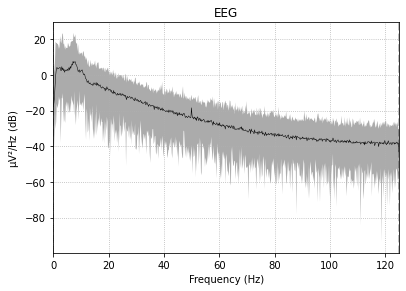

In [12]:
save_info_epo = epoch_raw.plot_psd(area_mode='range', tmax=4.9, show=False, average=True)
#psd


In [13]:
arrayt = mne.time_frequency.psd_array_welch(x, sfreq, fmin=0, fmax=125, n_fft=256, n_overlap=100, n_per_seg=None, n_jobs=1, average='mean', verbose=None)


Effective window size : 1.024 (s)


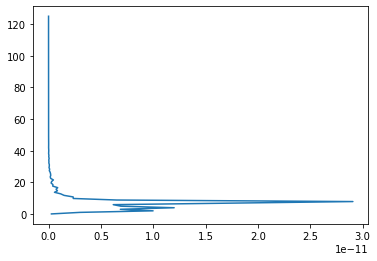

In [14]:

plt.plot(arrayt[0],arrayt[1])
plt.show()

In [15]:
#https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html

In [16]:
#standar erros mean
#filter 30hz? paper check
# - preproz bandpass filtered within 1-45 Hz (8th order, Butterworth filter)
# - (vi) band-pass filtering between 0.01-0.1 Hz (FSL),

# Gamma

# http://www.sci.utah.edu/publications/anderson10/Anderson_python_processing2010.pdf
#-



# cut it to diferent frec. bands theta (4-8Hz), alpha(8-13Hz), beta(13-30Hz), gamma(30-45Hz).
#-

#aver. ex/4-8 for power values -> 1 feature x epoch x sub. x brain region (chanels 12).
#all up / all bands  (to se the band power %)

In [17]:
#General aspects
titlegrup = ["ch1","ch2","ch3","ch4","ch5","ch6","ch7","ch8","ch9","ch10","ch11","ch12"]
ct_ty = ["eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg"]
sfreq = 250
info = mne.create_info(ch_names=titlegrup, sfreq=sfreq, ch_types=ct_ty)


In [18]:
#LOAD EC
xEC=mne.io.read_raw_eeglab('Files/Preprocessed/sub-010003_EC.set', preload=True, verbose=True)
#GET DATA
dataEC = xEC._data
#GET CHANELS
chanles_namesEC = xEC.ch_names
#REDUCE CHANELS TO 12
groups_date_finalleEC = opteciogrups(chanles_namesEC, groups, dataEC)
#TRANSFORM TO MNE
rawEC = mne.io.RawArray(groups_date_finalleEC, info)

Reading Files/Preprocessed/sub-010003_EC.fdt
Reading 0 ... 119515  =      0.000 ...   478.060 secs...
Creating RawArray with float64 data, n_channels=12, n_times=119516
    Range : 0 ... 119515 =      0.000 ...   478.060 secs
Ready.


In [19]:
#LOAD EO
xEO=mne.io.read_raw_eeglab('Files/Preprocessed/sub-010003_EO.set', preload=True, verbose=True)
#GET DATA
dataEO = xEO._data
#GET CHANELS
chanles_namesEO = xEO.ch_names
#REDUCE CHANELS TO 12
groups_date_finalleEO = opteciogrups(chanles_namesEO, groups, dataEO)
#TRANSFORM TO MNE
rawEO = mne.io.RawArray(groups_date_finalleEO, info)

Reading Files/Preprocessed/sub-010003_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Creating RawArray with float64 data, n_channels=12, n_times=120000
    Range : 0 ... 119999 =      0.000 ...   479.996 secs
Ready.


-------------------------------------


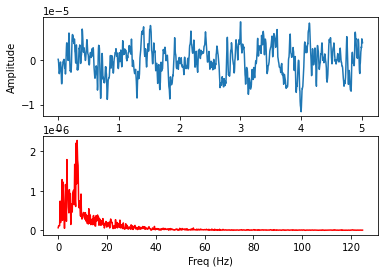

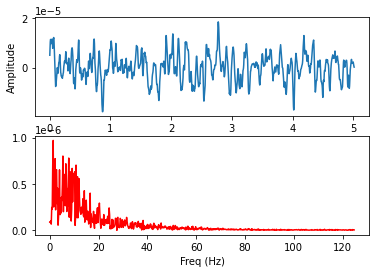

-------------------------------------


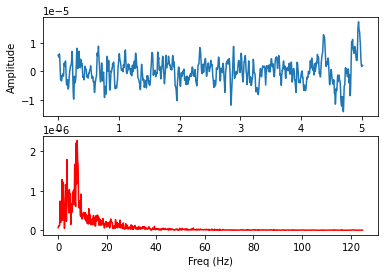

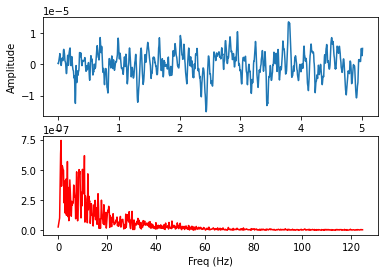

-------------------------------------


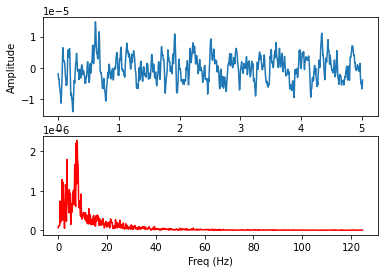

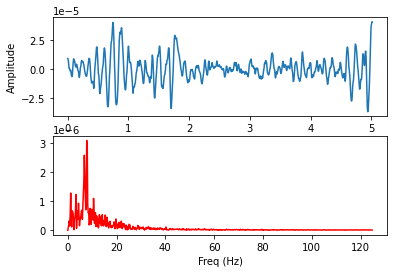

-------------------------------------


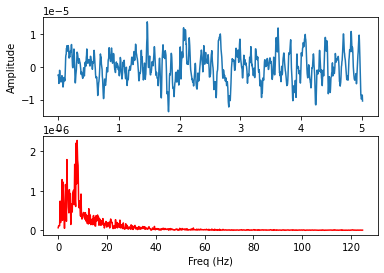

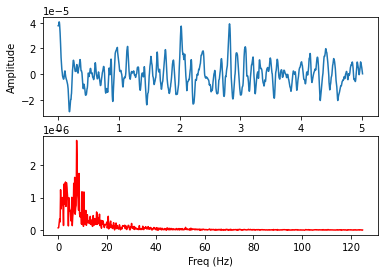

-------------------------------------


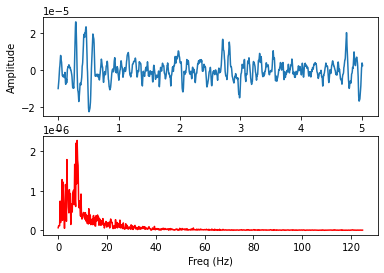

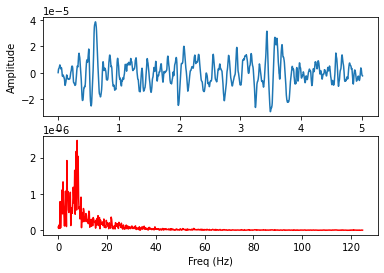

In [20]:
# epoch fuction (5s split with overlap)(n epochs x)

#
sf=250
#PARA MOSTRAR x PLOTS:
printsome = 0 #CREATE VARIABLE COUNTER
nummaxiterations = 4 #NUMBER OF PLOTS WE WANT
#INICIATE VARIABLES THAT WILL MOVE FOR EACH EPOC TIME.
tinici = 0
tfinal = 1257

r=0
#EPOCH COUNTER
numepo= 1

#WHAT CHANEL WE WORK UP ON 12
chanel = 1

#VARIABLES DONDE SE GUARDARAN LA INFORMACION DE LOS EPOCHS
save_epoc_data = []
save_epoc_temps = []



#INITIATE THE LOOP (TOTAL TIME DIVIDED IN PERIODS OF 5 SECONDS)
for i in range(0,int(int(T)/5)):

    #FROM THE CHANEL SELECTED EXTRACT THE t DATA
    tEC = grabt(groups_date_finalleEC[chanel])
    tEO = grabt(groups_date_finalleEO[chanel])

    #SELECT FROM t AND group_date THE DATA FROM POSITIONS tinici to tfinal
    epoc_tempsEC = tEC[tinici:tfinal-2]
    epoc_dataEC = groups_date_finalleEC[chanel,tinici:tfinal-2]

    epoc_tempsEO = tEO[tinici:tfinal-2]
    epoc_dataEO = groups_date_finalleEO[chanel,tinici:tfinal-2]
 
    if printsome<=int(nummaxiterations):

        print('-------------------------------------')
        coeffs = wavedec(epoc_dataEO, 'db4', level=6)

        #See data frq and time plt.
        Fs = 250.0 
        Ts = 1.0/Fs
        tn = np.arange(len(epoc_dataEO)) / Fs
        
        n = len(epoc_dataEO)                    #Length of the signal
        k = np.arange(n)
        Tn = n/Fs
        frq = k/Tn # two sides frequency range
        frq = frq[range(int(n/2))]
        Y = np.fft.fft(x)/n
        Y = Y[range(int(n/2))]
        fig, ax = plt.subplots(2, 1)
        ax[0].plot(tn,epoc_dataEO)
        ax[0].set_xlabel('Time')
        ax[0].set_ylabel('Amplitude')
        ax[1].plot(frq,abs(Y),'r')
        ax[1].set_xlabel('Freq (Hz)')
        plt.plot()
        plt.show()


        
        n = len(epoc_dataEC)                    #Length of the signal
        k = np.arange(n)
        Tn = n/Fs
        frq = k/Tn # two sides frequency range
        frq = frq[range(int(n/2))]
        Y = np.fft.fft(epoc_dataEC)/n
        Y = Y[range(int(n/2))]
        fig, ax = plt.subplots(2, 1)
        ax[0].plot(tn,epoc_dataEC)
        ax[0].set_xlabel('Time')
        ax[0].set_ylabel('Amplitude')
        ax[1].plot(frq,abs(Y),'r')
        ax[1].set_xlabel('Freq (Hz)')
        plt.plot()
        plt.show()

        

        
        printsome=printsome+1


    tfinal=tfinal+1257
    tinici= tinici+1257